### CHALLANGE 3 
SAMPLE DATA 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Create DataFrame from CSV-like string
data = {
    "Survived": [0, 1, 1, 1, 0],
    "Pclass": [3, 1, 3, 1, 3],
    "Age": [22.0, 38.0, 26.0, 35.0, 35.0],
    "Siblings/Spouses Aboard": [1, 1, 0, 1, 0],
    "Parents/Children Aboard": [0, 0, 0, 0, 0],
    "Fare": [7.25, 71.2833, 7.925, 53.1, 8.05]
}

df = pd.DataFrame(data)

print(df)

   Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0       3  22.0                        1                        0   
1         1       1  38.0                        1                        0   
2         1       3  26.0                        0                        0   
3         1       1  35.0                        1                        0   
4         0       3  35.0                        0                        0   

      Fare  
0   7.2500  
1  71.2833  
2   7.9250  
3  53.1000  
4   8.0500  


In [19]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]

# Combine into a summary DataFrame
summary_df = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})

# Optional: Round values for cleaner display
summary_df = summary_df.round(2)

# Style the table for notebook display
styled_summary = summary_df.style.set_caption("Titanic Summary Statistics")\
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#dbe9f4'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]}
    ])\
    .set_properties(**{'font-family': 'Arial', 'font-size': '14px'})

styled_summary


,Mean,Median,Mode
Survived,0.600000,1.000000,1.000000
Pclass,2.200000,3.000000,3.000000
Age,31.200000,35.000000,35.000000
Siblings/Spouses Aboard,0.600000,1.000000,1.000000
Parents/Children Aboard,0.000000,0.000000,0.000000
Fare,29.520000,8.050000,7.250000


From Challenge 6 - Calculate the variance standard deviation and four Quartiles in a way that makes sense

In [20]:
import matplotlib.pyplot as plt

# Variance
variance = df.var(numeric_only=True)

# Standard Deviation
std_dev = df.std(numeric_only=True)

# Quartiles (Q1, Q2, Q3) and Min/Max
quartiles = df.quantile([0.0, 0.25, 0.5, 0.75, 1.0], numeric_only=True)


# Transpose quartiles for better formatting
quartiles_transposed = quartiles.T
quartiles_transposed.columns = ['Min', 'Q1', 'Q2 (Median)', 'Q3', 'Max']

# Combine all stats
summary_df = pd.concat([variance.rename("Variance"),
                        std_dev.rename("Std Dev"),
                        quartiles_transposed], axis=1)

# Round for clarity
summary_df = summary_df.round(2)

# Style for notebook display
styled_summary = summary_df.style.set_caption("📈 Titanic Spread & Distribution Summary")\
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f0f8ff'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]}
    ])\
    .set_properties(**{'font-family': 'Arial', 'font-size': '14px'})

styled_summary




,Variance,Std Dev,Min,Q1,Q2 (Median),Q3,Max
Survived,0.300000,0.550000,0.000000,0.000000,1.000000,1.000000,1.000000
Pclass,1.200000,1.100000,1.000000,1.000000,3.000000,3.000000,3.000000
Age,46.700000,6.830000,22.000000,26.000000,35.000000,35.000000,38.000000
Siblings/Spouses Aboard,0.300000,0.550000,0.000000,0.000000,1.000000,1.000000,1.000000
Parents/Children Aboard,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fare,930.860000,30.510000,7.250000,7.920000,8.050000,53.100000,71.280000


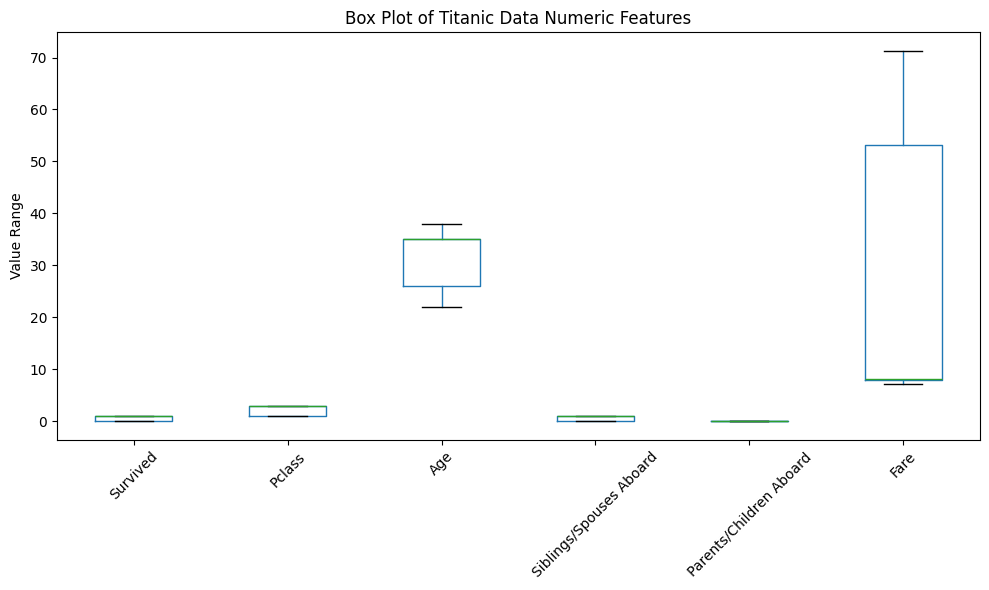

In [21]:
####################VARIANCE#############################
# Variance

variance = df.var(numeric_only=True)

# Standard Deviation
std_dev = df.std(numeric_only=True)

# Quartiles
quartiles = df.quantile([0.0, 0.25, 0.5, 0.75, 1.0], numeric_only=True).T
quartiles.columns = ['Min', 'Q1', 'Median (Q2)', 'Q3', 'Max']

# Combine into a summary table
summary_df = pd.concat([variance.rename("Variance"),
                        std_dev.rename("Std Dev"),
                        quartiles], axis=1).round(2)

summary_df

####################VARIANCE#############################


#import matplotlib.pyplot as plt

# Get numeric column names as a list
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Create box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=numeric_cols, grid=False)
plt.title("Box Plot of Titanic Data Numeric Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



🎯 1. Scatter Plot: Age vs Fare

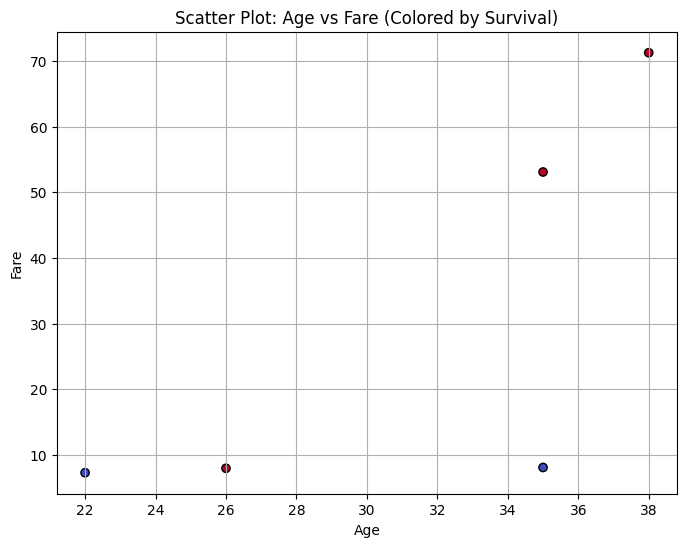

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', edgecolors='k')
plt.title("Scatter Plot: Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

📊 2. Histogram: Age Distribution

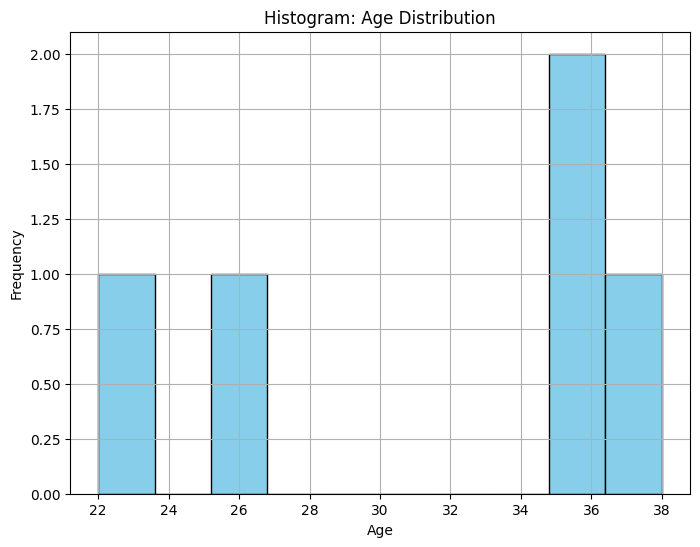

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

📦 3. Box-Whisker Plot: Fare Spread

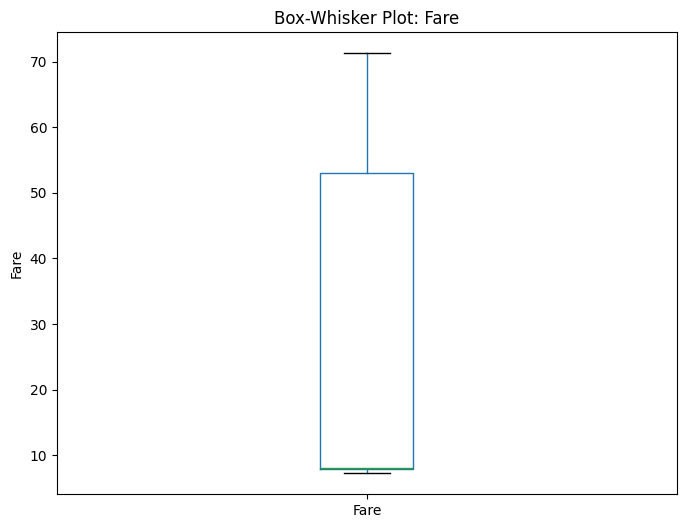

In [24]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Fare', grid=False)
plt.title("Box-Whisker Plot: Fare")
plt.ylabel("Fare")
plt.show()

4. Venn Diagram: Survived vs Pclass (Simplified)
Venn diagrams are best for categorical overlaps. Since we have small data, we’ll use matplotlib_venn to show overlap between:
- Passengers who survived
- Passengers in 3rd class


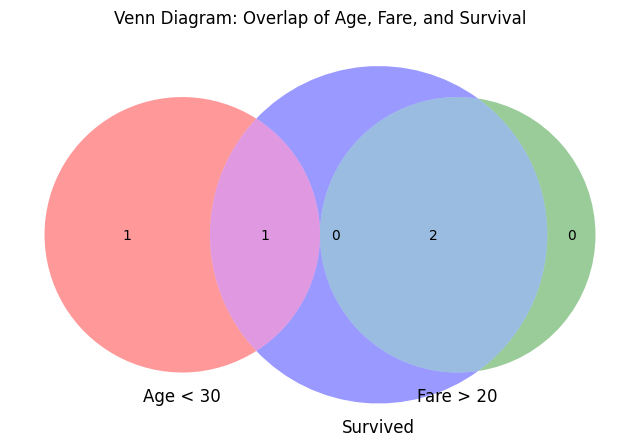

In [25]:
from matplotlib_venn import venn3

# Define sets
young = set(df[df['Age'] < 30].index)
high_fare = set(df[df['Fare'] > 20].index)
survived = set(df[df['Survived'] == 1].index)

plt.figure(figsize=(8, 6))
venn3([young, high_fare, survived], ('Age < 30', 'Fare > 20', 'Survived'))
plt.title("Venn Diagram: Overlap of Age, Fare, and Survival")
plt.show()

SUMMARY:-
- count: number of non-null entries
- mean, std, min, max
- 25%, 50% (median), 75% percentiles
- For categorical columns: unique values, top value, and frequency

In [26]:
import pandas as pd

# Load your dataset
df = pd.read_csv("data/sets/titanic_data.csv")

# Generate summary statistics
summary = df.describe(include='all').transpose()

# Display the summary
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,887.0,NaN,NaN,NaN,0.385569,0.487004,0.0,0.0,0.0,1.0,1.0
Pclass,887.0,NaN,NaN,NaN,2.305524,0.836662,1.0,2.0,3.0,3.0,3.0
Name,887,887,Mr. Owen Harris Braund,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,887,2,male,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,887.0,NaN,NaN,NaN,29.471443,14.121908,0.42,20.25,28.0,38.0,80.0
Siblings/Spouses Aboard,887.0,NaN,NaN,NaN,0.525366,1.104669,0.0,0.0,0.0,1.0,8.0
Parents/Children Aboard,887.0,NaN,NaN,NaN,0.383315,0.807466,0.0,0.0,0.0,0.0,6.0
Fare,887.0,NaN,NaN,NaN,32.30542,49.78204,0.0,7.925,14.4542,31.1375,512.3292


Summary Function (R-style)


In [27]:
def summary(df):
    return pd.DataFrame({
        "Min": df.min(numeric_only=True),
        "Q1": df.quantile(0.25, numeric_only=True),
        "Median": df.median(numeric_only=True),
        "Mean": df.mean(numeric_only=True),
        "Q3": df.quantile(0.75, numeric_only=True),
        "Max": df.max(numeric_only=True),
        "Std Dev": df.std(numeric_only=True),
        "NA Count": df.isnull().sum()
    }).round(2)

summary(df)

,Min,Q1,Median,Mean,Q3,Max,Std Dev,NA Count
Age,0.42,20.25,28.00,29.47,38.00,80.00,14.12,0
Fare,0.00,7.92,14.45,32.31,31.14,512.33,49.78,0
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Parents/Children Aboard,0.00,0.00,0.00,0.38,0.00,6.00,0.81,0
Pclass,1.00,2.00,3.00,2.31,3.00,3.00,0.84,0
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Siblings/Spouses Aboard,0.00,0.00,0.00,0.53,1.00,8.00,1.10,0
Survived,0.00,0.00,0.00,0.39,1.00,1.00,0.49,0


In [28]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 22],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 55000]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Define a function to highlight rows based on a condition
def highlight_age(row):
    return ['background-color: blue' if row.Age > 30 else '' for _ in row]

# Apply the styling
styled_df = df.style.apply(highlight_age, axis=1)\
                    .set_table_styles([
                        {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]},
                        {'selector': 'tbody td', 'props': [('border', '1px solid black')]}
                    ])\
                    .set_properties(**{'font-family': 'Arial', 'font-size': '14px'})

# Display the styled DataFrame
styled_df

,Name,Age,Gender,Salary
0,Alice,25,Female,50000
1,Bob,30,Male,60000
2,Charlie,35,Male,70000
3,David,40,Male,80000
4,Eva,22,Female,55000
